# Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from pandas.plotting import register_matplotlib_converters


# Helper functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    register_matplotlib_converters()
    #sns.set_theme(style="ticks")

    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None

In [3]:
jupyter_settings() 

In [4]:
### read in the data
path = 'D:/jupyter/micro-projects/brndnaxr-practice-x/practice-time-series/'
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv(path + 'data/raw/AirPassengers.csv',
                parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse) 

In [5]:
base.head(5) 

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

In [7]:
# criação da série temporal (ts)
ts = base['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [8]:
# Visualização de registro específico
ts[1]

118

In [9]:
# Visualização por ano e mês
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [10]:
# Visualização de data específica
ts[datetime(1949,2,1)]

118

In [11]:
# Visualização de intervalos
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [12]:
# Visualização de intervalos sem preencher a data de início
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [13]:
# Visualização por ano
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [14]:
# Valores máximos 
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [15]:
# mínimos
ts.index.min()

Timestamp('1949-01-01 00:00:00')

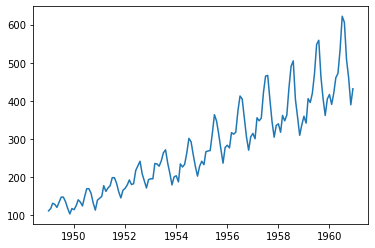

In [16]:
# Visualização da série temporal completa
plt.plot(ts)

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: #Passengers, dtype: int64

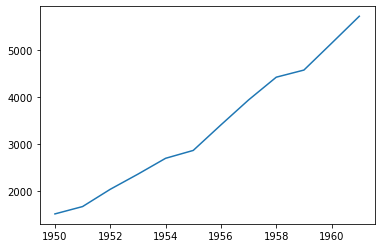

In [17]:
# Visualização por ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)
ts_ano

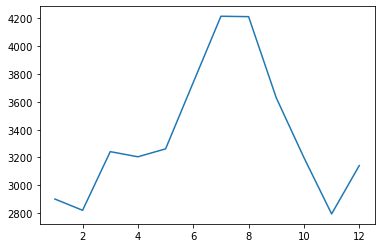

In [18]:
# Visualização por mês
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

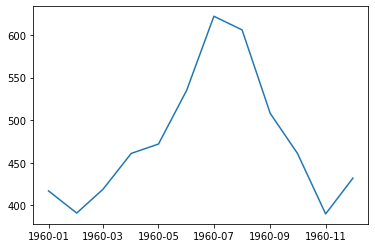

In [19]:
# Visualização entre datas específicas
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)